# Assignment Kennis en Data




## Notebook made by


|Naam|Studentnummer|
|-|-|
|Luuk|secret |
|Zubin|secret|
|Thijs|secret |
|Merijn|secret|

## Peerreview

* Vul onderstaande dict/tabel in en run de cel. Klopt het? Zijn jullie het er allemaal mee eens?
    * Verander `1,2,3,4` door jullie studentnummers
    * `1: {1:.2,2:.3,3:.3,4:.2}` betekent dat student 1 zijn punt zo over de 4 studenten verdeelt
    * Let op, per student moeten de punten optellen tot 1!
    * De gegeven punten staan in de tabel op de rijen, de ontvangen punten in de kolommen.
    * met `cijfer_per_student` kan je bepalen welk cijfer ieder krijgt bij een gegeven groepscijfer.

## Toelichting

* De meeste opgaven worden automatisch nagekeken. Bij vrijwel alle opdrachten staan er een paar tests onder de opdracht, dit is voornamelijk om te zorgen dat je de juiste type output geeft. Dit zijn dus *NIET* alle tests, die komen er bij het graden nog bij.
* Elke vraag is 1 punt waard, tenzij anders aangegeven. Soms is die punt onderverdeeld in deelpunten, maar niet altijd. 

## Voor het inleveren!

* Pas niet de cellen aan, vooral niet die je niet kunt editen. Dit levert problemen op bij nakijken. Twijfel je of je per ongeluk iets hebt gewijzigd, kopieer dan bij inleveren je antwoorden naar een nieuw bestand, zodat het niet fout kan gaan.

* Zorg dat de code goed runt van boven naar beneden, verifieer dat door boven in Kernel -> Restart & Run All uit te voeren

## Na het inleveren!

* Het gebeurt erg vaak dat mensen een "leeg bestand" inleveren. Vaak een andere versie van de opgave die nog ergens op je computer rondslingerde. Zonde van al je werk toch!
* Dus, lever **minstens een half uur voor tijd in**. Download dan wat je hebt ingeleverd op Canvas. Geef het een andere naam om verwarring te voorkomen. En draai alle cellen, en bekijk het. Geen syntax fouten? Alle vragen gemaakt? Dan zit het vast wel goed, en hoef je niet in de zenuwen te zitten.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#RDF-plus-RDFS-conversion" data-toc-modified-id="RDF-plus-RDFS-conversion-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>RDF plus RDFS conversion</a></span><ul class="toc-item"><li><span><a href="#Vereisten" data-toc-modified-id="Vereisten-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Vereisten</a></span></li><li><span><a href="#Grading" data-toc-modified-id="Grading-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Grading</a></span></li></ul></li></ul></div>

# RDF plus RDFS conversion

* We will transform our family and LHBTI++ knowledge base into an RDF database and query it using SPARQL.
* The idea is that **you create this notebook as a tutorial on working with `rdflib`**.
* You will find many on the web, so search, watch and use the best what you can find to make a fun and top tutorial.

## Vereisten

1. `networkx2RDF(G)` takes any digraph G with additional node attributes and transform it to an RDF database.
2. Maak SPARQL queries voor al je gedefinieerde relaties. 
    * Check dat de antwoorden identiek zijn.
3. Download een andere triple store en maak daar juist een networkx graaf van (dat kan met rdflib), en bereken wat netwerk maten daarop.

## Grading

* Deze opdracht doen we met peergrading.
* Ieder groepje kijkt alle anderen en zichzelf na en geeft ieder groepje een deel van in totaal 100 te verdelen  punten.
* De eindscores transformeren we dan naar een cijfer tussen de 1 en 10. 

In [2]:
#!pip install rdflib
# See https://rdflib.readthedocs.io/en/stable/gettingstarted.html
from rdflib import  Graph
import networkx as nx
from rdflib.namespace import RDF, FOAF
from rdflib import Namespace

# Basis van RDF

RDF staat voor:

**R**: Recourse 

**D**: Descripiton

**F**: Framework

Met RDF is het mogelijk om data een betekenis te geven en uit te wisselen.\
Deze data staan in de vorm van (subject, predicaat, object)
![image.png](https://i.imgur.com/51LnaQD.png)

**Subject**: Het onderwerp van de data.

**Predicaat**: Predicaat geeft de link tussen subject en object weer.

**Object**: Waar het onderwerp aan gekoppelt is.
\
\
\
**Opdracht 1**

RDF triples lijken dus erg op predicaat logica: Relatie(p,q).\
Probeer de volgende twee predicaat logische formules om te schrijven naar RDF triples.

**Formule**:  (Relatie(Piet,Jan))

Jouw antwoord:

Lukt het ook om een RDF triple om te zetten naar predicaat logica?

**Formule**: (Hans, opa van, Hendrik)

Jouw antwoord:



# Van networkx graph naar RDF database

Een RDF triple heeft dus een subject, predicaat en een object.\
Om een netwerk met nodes naar een RDF database te vertalen heb je dus in ieder geval deze drie variabelen nodig.

Er zijn 2 verschillende manieren om deze relaties weer te geven.\
De eerste manier is het gebruik van edges tussen nodes: (node, edge met, node).\
De node waar de directed edge start is het subject, de edge het predicaat en heb object\
waar de directed edge naar toe gaat. 


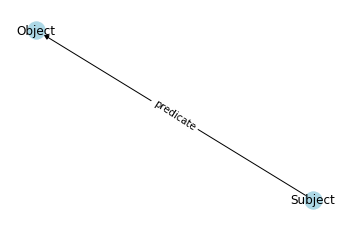

In [3]:
#digraph van subject en object met predicaat.
V = nx.DiGraph()
V.add_edge('Subject','Object')
pos = nx.spring_layout(V)
nx.draw_networkx_edge_labels(V,pos,edge_labels={('Object','Subject'):'predicate'},font_color='black')
nx.draw(V, with_labels=True, node_color='lightblue')

De tweede manier is om de relatie om te zetten door middel van attributen: W.add_node('Hans', predicaat='Object').\
De node is hier nog steeds het subject maar de predicaat en het object zijn anders.\
Het predicaat is nu namelijk het type attribuut bijvoorbeeld geslacht en het attribuut zelf wordt het object.\
Zo kan je makkelijk aangeven dat Piet bijvoorbeeld een man is ons schema.

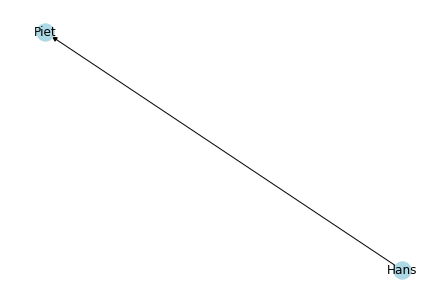

In [4]:
# digraph van personen, waar object attribuut is.
W = nx.DiGraph()
W.add_node('Hans', predicaat='Object')
W.add_node('Piet', predicaat = 'Object')
W.add_edge('Hans','Piet')
pos = nx.spring_layout(W)
nx.draw(W, with_labels=True, node_color='lightblue')

Om de networkx graphs om te zetten naar een RDF database, moeten er een aantal stappen gevolgd worden.

**Stap 1**

De eerste stap is om de verschillende relaties in te delen in triples.\
Dus hier worden relaties tussen de nodes en attributen van de nodes bedoelt.\
relaties tussen nodes: (node, predicaat, node2) -> (hans, relation with, piet)\
attributen nodes: (node, predicaat, attribuut) -> (hans, geslacht, man) 

**Stap 2**

Alle delen van een triple moeten verandert worden in een URI.\
Dit zijn benamingen voor bronnen (in dit geval onze nodes en edges).\
Deze link lijkt erg op een welbekende URL dat ook een unieke benaming is voor een webadres.\
Voorbeeld van URI: http://voorbeeldURI.org/Hans

**Opdracht 2**: Verander de delen van de volgende triple in URI's: (Hans,relatie,Peter)

Jouw antwoord:

**Stap 3**

Om van de triples een database te maken voeg je elke triple toe aan een graph.\
De benaming hiervoor in python is: Graph()


In de code hieronder worden deze stappen uitgevoerd.\
Waarna een RDF database gereturnt wordt.

In [5]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function
from __future__ import unicode_literals
from rdflib import BNode
import logging
#Functie voor maken van RDF
def networkx2RDF(G):
    g = Graph()
    ex = Namespace("http://mooistefunctie.org/")
    for edge in G.edges:
        g.add((ex.term(edge[0]), ex.relationwith, ex.term(edge[1])))
    for node in G.nodes:
        key1, value1 = list(G.nodes[node].items())[0]
        key2, value2 = list(G.nodes[node].items())[1]
        g.add((ex.term(node), RDF.type, ex.term(value1)))
        g.add((ex.term(node), RDF.type, ex.term(value2)))
    return(g)   

# Het maken van sparql queries

Sparql kan gebruikt worden om informatie uit een RDF database te halen.\
Bijvoorbeeld bij familie databases, wie een opa van iemand is. 

Je vraagt deze informatie op door middel van een query.\
De query is als volgt ingedeeld:
(welke info wil ik - waar moet het aan voldoen) -> (SELECT ?a WHERE { ?a relation with ?b. ?b relation with ?c).\



(rdflib.term.URIRef('http://mooistefunctie.org/dochter'), rdflib.term.URIRef('http://www.w3.org/1999/02/22-rdf-syntax-ns#type'), rdflib.term.URIRef('http://mooistefunctie.org/Hetero'))


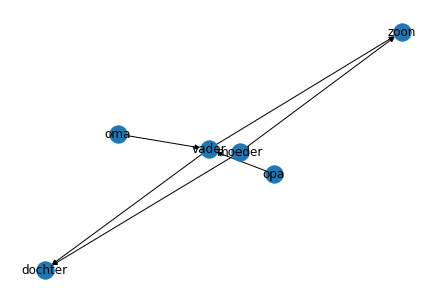

In [6]:
#digraph voor familierelaties.
fm = nx.DiGraph()
fm.add_node('opa', sex='Hetero', geslacht='man')
fm.add_node('vader', sex='Hetero', geslacht = 'man')
fm.add_node('zoon', sex='Hetero', geslacht = 'man' )
fm.add_node('oma', sex='Hetero', geslacht = 'vrouw')
fm.add_node('moeder', sex='Hetero', geslacht = 'vrouw')
fm.add_node('dochter', sex='Hetero', geslacht = 'vrouw')
fm.add_edges_from([('opa','vader'),('vader','zoon'),('vader','dochter'), ('oma','vader'), ('moeder', 'dochter'),('moeder','zoon')])
nx.draw(fm, with_labels=True)
fd = networkx2RDF(fm)
print(list(fd)[8])

Hieronder staan een aantal voorbeelden van queries voor familierelaties:

In [7]:

Vader = fd.query("""SELECT DISTINCT ?a WHERE {?a <http://mooistefunctie.org/relationwith> ?b. ?a <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> <http://mooistefunctie.org/man>}""")
Moeder= fd.query("""SELECT DISTINCT ?a WHERE {?a <http://mooistefunctie.org/relationwith> ?b. ?a <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> <http://mooistefunctie.org/vrouw>}""")
Oma = fd.query("""SELECT DISTINCT ?a WHERE {?a  <http://mooistefunctie.org/relationwith> ?b. ?a <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> <http://mooistefunctie.org/vrouw>. ?b <http://mooistefunctie.org/relationwith> ?c}""")
Opa = fd.query("""SELECT DISTINCT ?a WHERE {?a  <http://mooistefunctie.org/relationwith> ?b. ?a <http://www.w3.org/1999/02/22-rdf-syntax-ns#type> <http://mooistefunctie.org/man>. ?b <http://mooistefunctie.org/relationwith> ?c}""")


**Opdracht 3**: Probeer in de onderstaande cell zelf een aantal sparql queries te maken.

In [8]:
# (haal comment weg:) Kleindochter = fd.query()

# (haal comment weg:) Kleinzoon = fd.query()

# check: print("Kleindochter:", list(Kleindochter))
# check: print("Kleinzoon:", list(Kleinzoon))

**Extra vraag**: is het mogelijk om een query voor zus te maken?

jouw antwoord:

# Van RDFlib naar networkx

In deze tutorial heb je geleerd hoe je van een networkx graph naar een RDF database gaat, en hoe je hierin queries kan maken.

Natuurlijk kan je dan ook van een RDF database naar een networkx graph werken.

Hieronder zie je de RDF database van de film Shrek.
![shrek](https://i.imgur.com/Mu8MPc4.png)

In [9]:
g=Graph()
g.parse('http://dbpedia.org/resource/Shrek')

shrek= [triple for triple in g]
shrek[:2], len(shrek)

([(rdflib.term.URIRef('http://dbpedia.org/resource/Shrek_(disambiguation)'),
   rdflib.term.URIRef('http://dbpedia.org/ontology/wikiPageDisambiguates'),
   rdflib.term.URIRef('http://dbpedia.org/resource/Shrek')),
  (rdflib.term.URIRef('http://dbpedia.org/resource/Fairy_tale_parody'),
   rdflib.term.URIRef('http://dbpedia.org/ontology/wikiPageWikiLink'),
   rdflib.term.URIRef('http://dbpedia.org/resource/Shrek'))],
 1283)

Om deze RDF database om te zetten naar een networkx graph moet\
er een functie gebruikt worden die uit de rdflib documentatie komt.\
Zie de functie hieronder:

In [10]:
# documentatie functie: https://rdflib.readthedocs.io/en/stable/_modules/rdflib/extras/external_graph_libs.html
def _identity(x): return x
def _rdflib_to_networkx_graph(
        graph,
        nxgraph,
        calc_weights,
        edge_attrs,
        transform_s=_identity, transform_o=_identity):
    assert callable(edge_attrs)
    assert callable(transform_s)
    assert callable(transform_o)
    import networkx as nx
    for s, p, o in graph:
        ts, to = transform_s(s), transform_o(o)  # apply possible transformations
        data = nxgraph.get_edge_data(ts, to)
        if data is None or isinstance(nxgraph, nx.MultiDiGraph):
            # no edge yet, set defaults
            data = edge_attrs(s, p, o)
            if calc_weights:
                data['weight'] = 1
            nxgraph.add_edge(ts, to, **data)
        else:
            # already have an edge, just update attributes
            if calc_weights:
                data['weight'] += 1
            if 'triples' in data:
                d = edge_attrs(s, p, o)
                data['triples'].extend(d['triples'])

            
def rdflib_to_networkx_digraph(
        graph,
        calc_weights=True,
        edge_attrs=lambda s, p, o: {'triples': [(s, p, o)]},
        **kwds):
    dg = nx.DiGraph()
    _rdflib_to_networkx_graph(graph, dg, calc_weights, edge_attrs, **kwds)
    return dg


In de volgende code cell kan de functie worden aangeroepen.\
De graph die eruit komt geeft informatie over de film Shrek weer.


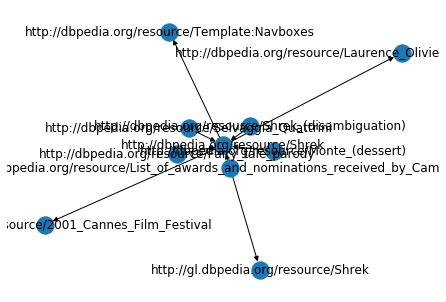

In [11]:
graaf= rdflib_to_networkx_digraph(
        shrek[:10],
        calc_weights=True,
        edge_attrs=lambda s, p, o: {'triples': [(s, p, o)]})
nx.draw(graaf, with_labels=True)

**Opdracht 4**: Lukt het jou om dezelfde soort graph te maken,\
met een triple store van een andere film (bijvoorbeeld Harry Potter)? 

In [12]:
# jouw code, succes!

Dit was het einde van de tutorial, zijn alle opdrachten gelukt?